In this homework, we'll be looking at the infamous Titanic dataset. It's become a canonical example for budding data scientists beginning machine learning and will be a good case study in using logistic regression.

From the project description on [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted'):
###Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

As with any start of a data science problem make sure you import your libraries!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from seaborn import plt
import pylab as pl
from itertools import product
from sklearn import datasets, svm


#from statsmodels.nonparametric.kde import KDEUnivariate
#from statsmodels.nonparametric import smoothers_lowess
#from pandas import Series, DataFrame
#from patsy import dmatrices
#from sklearn import datasets, svm
#from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details



#import additional libraries here if you need them

Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [2]:
df=pd.read_csv("/Users/bingrongwang/DAT_SF_12/data/titanic_training.csv")
print df.head()
print df.columns

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex  age  sibsp  parch            ticket     fare cabin embarked  
0    male   22      1      0         A/5 21171   7.2500   NaN        S  
1  female   38      1      0          PC 17599  71.2833   C85        C  
2  female   26      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female   35      1      0            113803  53.1000  C123        S  
4    male   35      0      0            373450   8.0500   NaN        S  
Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked'

In [3]:
df



,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [16]:

df = df.drop(['ticket','cabin'], 1)


ValueError: labels ['ticket' 'cabin'] not contained in axis

In [17]:
df = df.dropna()

While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

In [19]:
print df.describe()

         survived      pclass         age       sibsp       parch        fare
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std      0.491139    0.836854   14.492933    0.930692    0.854181   52.938648
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.000000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.645850
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


In [20]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
survived,712,0.404494,0.491139,0.00,0.00,0.00000,1,1.0000
pclass,712,2.240169,0.836854,1.00,1.00,2.00000,3,3.0000
age,712,29.642093,14.492933,0.42,20.00,28.00000,38,80.0000
sibsp,712,0.514045,0.930692,0.00,0.00,0.00000,1,5.0000
parch,712,0.432584,0.854181,0.00,0.00,0.00000,1,6.0000
fare,712,34.567251,52.938648,0.00,8.05,15.64585,33,512.3292


In [5]:
print df.std()

survived     0.486592
pclass       0.836071
age         14.526497
sibsp        1.102743
parch        0.806057
fare        49.693429
dtype: float64


Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

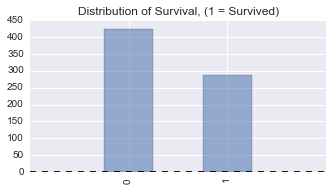

In [24]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

alpha=alpha_scatterplot = 0.2 

alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))

df.survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")




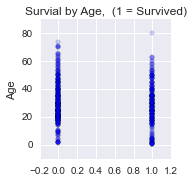

In [25]:
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.survived, df.age, alpha=alpha_scatterplot)
plt.ylabel("Age")                         
plt.grid(b=True, which='major', axis='y')  
plt.title("Survial by Age,  (1 = Survived)")

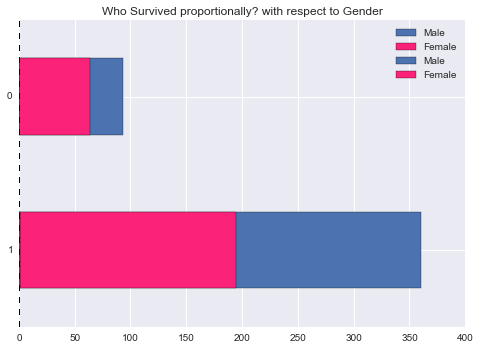

In [28]:
ax1 = fig.add_subplot(121)
df.survived[df.sex == 'male'].value_counts().plot(kind='barh',label='Male')
df.survived[df.sex == 'female'].value_counts().plot(kind='barh', color='#FA2379',label='Female')
ax1.set_ylim(-1, 2) 
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')


# adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df.survived[df.sex == 'male'].value_counts()/float(df.sex[df.sex == 'male'].size)).plot(kind='barh',label='Male')  
(df.survived[df.sex == 'female'].value_counts()/float(df.sex[df.sex == 'female'].size)).plot(kind='barh', color='#FA2379',label='Female')
ax2.set_ylim(-1, 2)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

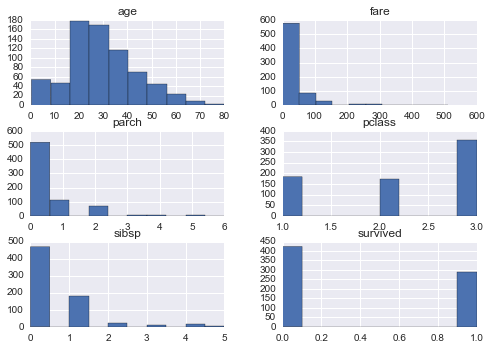

In [29]:
df.hist()
pl.show()

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [31]:
#Create your model here
formula = 'survived ~ C(pclass) + C(sex) + age + sibsp  + C(embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [33]:
lgt = smf.logit('survived ~ age + pclass + fare + sibsp', df)
logit_fit = lgt.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.574272
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Mar 2015   Pseudo R-squ.:                  0.1490
Time:                        17:55:41   Log-Likelihood:                -408.88
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 6.002e-30
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.3505      0.506      6.619      0.000         2.358     4.343
age           -0.0457      0.007     -6.346      0.000        -0.060    -0.032
pclass        -1.1036      0.145     -7.605      0.000        -1.388    -0.819
fare           0.0045      0.003      1.722      0.085        -0.001     0.010
sibsp         -0.2199      0.101     -2.187      0.029        -0.417    -0.023
==============================================================================
"""

#How do I test my results?
There are a few ways to evaluate your model. One is by comparing it to the test set and calculating a prediction accuracy. This method would work if you have the outcome variable in your test set. Unfortunately for this dataset, Kaggle has withheld that, probably to prevent overfitting. You could also interpret it further by delving deeper into the summary information the model provides. This could involve looking at confidence intervals and odd ratios for the coefficients. 

In [10]:
#Evaluate results here

(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

If you do submit on Kaggle, post your Kaggle accuracy on Hipchat and see how you compare to your classmates!

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*

#Notes:
- There is missing data that you may want to remove before you begin running your analysis.
- Beware of overfitting! Sometimes a good prediction accuracy with the test set may not necessarily translate to the best result you would get on Kaggle.
